# Probability Tutorial 2 
# Continuous Random Variables
1. Normal Distribution
2. Exponential Distribution
3. Uniform Random Variable 

In [ ]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

# Uniform Random Variable 
Generation and PDF Plot \\
We will generate samples from uniform random variable U~(a,b) with different values of a and b. \\
Next we plot the pdf over large set of samples. \\

1. X ~ U(0,1)

Text(0.5, 1.0, 'PDF Of U~(0,1)')

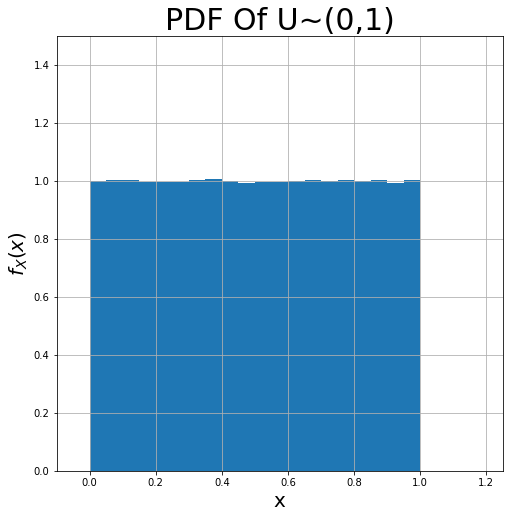

In [86]:
#We generate 10,000 samples from U~[0,1]
UNIF_SAMPLES = np.random.uniform(low=0, high=1, size=1000000)
#print(UNIF_SAMPLES[:10]) 
#plot the graph
plt.figure(figsize=(8,8))
plt.hist(UNIF_SAMPLES, bins=20, density=True)
plt.grid()
plt.xlabel('x',fontsize=20)
plt.ylabel('$f_{X}(x)$',fontsize=20)
plt.xlim((-0.1,1.25))
plt.ylim((0,1.5))
plt.title('PDF Of U~(0,1)', fontsize=30)

Now if we change a and b, we get the density function rescaled to $\frac{1}{b-a}$. \\

2. X ~ U(0,10)

Text(0.5, 1.0, 'PDF Of U~(0,10)')

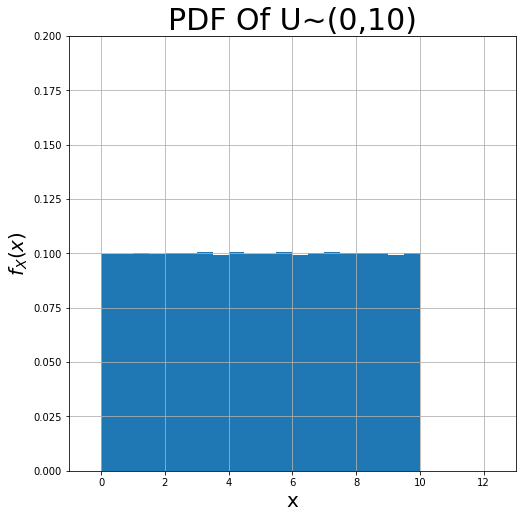

In [87]:
#We generate 10,000 samples from U~[0,10]
UNIF_SAMPLES = np.random.uniform(low=0, high=10, size=1000000)
#print(UNIF_SAMPLES[:10]) 
#plot the graph
plt.figure(figsize=(8,8))
plt.hist(UNIF_SAMPLES, bins=20, density=True)
plt.grid()
plt.xlabel('x',fontsize=20)
plt.ylabel('$f_{X}(x)$',fontsize=20)
plt.xlim((-1,13))
plt.ylim((0,0.2))
plt.title('PDF Of U~(0,10)', fontsize=30)

Mean and Variance of U~(0,10)

a. $E[X] = \frac{a+b}{2} = 5 $ \\
b. $Var[X] = \frac{(b-a)^2}{12} = \frac{100}{12}$ \\

Simulated Values from samples: 

a. $E[X] = \frac{1}{N} \sum_{i=1}^{N}X_{i}$ \\
b. $Var[X] = \frac{1}{N}\sum_{i=1}^{N}(X_{i}-(E[X]))^2$

In [22]:
SIM_AVERAGE = np.mean(UNIF_SAMPLES)
SIM_VARIANCE = np.var(UNIF_SAMPLES)

In [28]:
print('Average ={:.3f}'.format(SIM_AVERAGE),'\t Variance = {:.3f}'.format(SIM_VARIANCE ))

Average =4.998 	 Variance = 8.331


# Normal Random Variable 
$N \sim (\mu , \sigma^2)$ \\
Consider the case where mean is 0 and Variance is 1. \\

We plot $N \sim (0 , 1)$

Text(0.5, 1.0, 'PDF Of N~(0,1)')

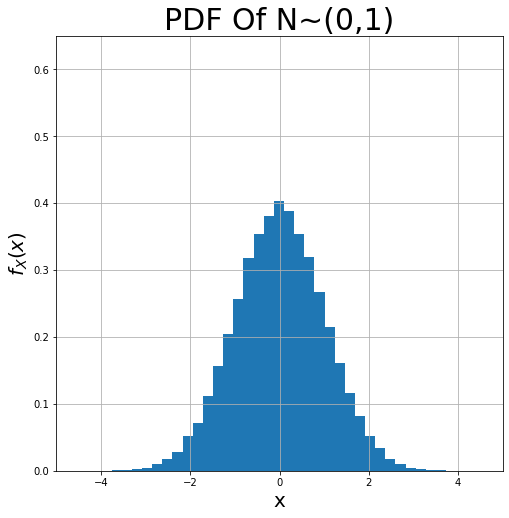

In [88]:
N_SAMPLES = np.random.normal(0,1,size=100000)

plt.figure(figsize=(8,8))
plt.hist(N_SAMPLES, bins=40, density=True)
plt.grid()
plt.xlabel('x',fontsize=20)
plt.ylabel('$f_{X}(x)$',fontsize=20)
plt.xlim((-5,5))
plt.ylim((0,0.65))
plt.title('PDF Of N~(0,1)', fontsize=30)

Now we observe the case with mean 5 and different values of Variance. \\
$N \sim (5,2)$

Text(0.5, 1.0, 'PDF Of N~(5,)')

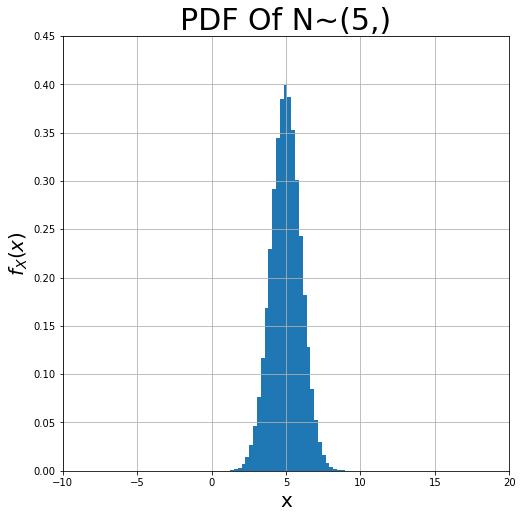

In [89]:
N_SAMPLES = np.random.normal(5,1,size=1000000)

plt.figure(figsize=(8,8))
plt.hist(N_SAMPLES, bins=40, density=True)
plt.grid()
plt.xlabel('x',fontsize=20)
plt.ylabel('$f_{X}(x)$',fontsize=20)
plt.xlim((-10,20))
plt.ylim((0,0.45))
plt.title('PDF Of N~(5,)', fontsize=30)

# Exponential Random Variable \\
$X \sim Exp(\lambda)$

Let the rate parameter $\lambda$ = 1 

Note:
np.random.exponential(mean=,size=) \\
The input parameter to RV here is $1/λ$

Text(0.5, 1.0, 'PDF Of Exp(1)')

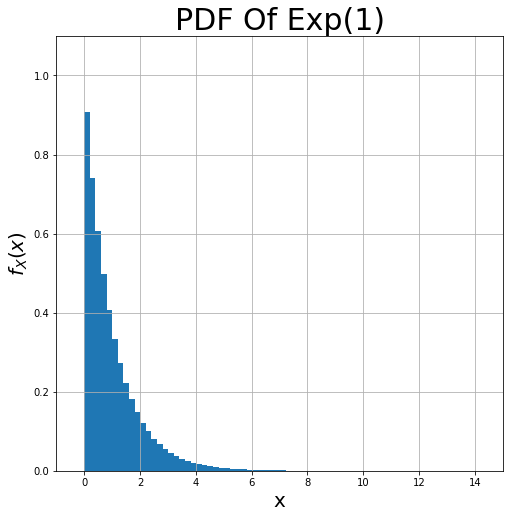

In [90]:
E_SAMPLES = np.random.exponential(1,size=10000000)

plt.figure(figsize=(8,8))
plt.hist(E_SAMPLES, bins=80, density=True)
plt.grid()
plt.xlabel('x',fontsize=20)
plt.ylabel('$f_{X}(x)$',fontsize=20)
plt.xlim((-1,15))
plt.ylim((0,1.1))
plt.title('PDF Of Exp(1)', fontsize=30)

## Problem 1
Suppose you enter a bank having two clerks. The service time of the clerks are exponentially distributed with rates $\lambda_{1} = 2$ per hour and $\lambda_{2} = 3$ per hour respectively. At the moment both the clerks are busy but there is no one else waiting in line. You will enter service when either one of the clerks becomes free. \\
1. Find the probability that clerk 1 becomes free first. 
2. What is the mean waiting time before you are served. 

##Theoretical Solution:
1. P(Clerk 1 becomes free first) = $\frac{λ_{1}}{λ_{1}+λ_{2}} = \frac{2}{5}$
2. $E[Y] = E[min(X1,X2)] = \frac{1}{λ_{1}+λ_{2}} = \frac{1}{5}$ hours = 12 minutes.

In [79]:
#Part 1
#we generate a million samples of both exponential random variables.
NO_OF_SAMPLES = 1000000
c1 = np.random.exponential((1/2), size=NO_OF_SAMPLES)
c2 = np.random.exponential((1/3), size=NO_OF_SAMPLES)

x = np.less(c1, c2)
print("First 5 samples of Clerk 1 service times = ", c1[:5])
print("First 5 samples of Clerk 2 service times = ", c2[:5])
print("First 5 samples of X = ", x[:5])
print("\nPr[Clerk 1 becomes free first] = {:.3f}".format(np.sum(x)/NO_OF_SAMPLES))

First 5 samples of Clerk 1 service times =  [0.06997358 0.42108861 0.16487131 0.25289825 0.06447958]
First 5 samples of Clerk 2 service times =  [0.35113891 0.25313057 0.05062338 0.04033901 0.25361309]
First 5 samples of X =  [ True False False False  True]

Pr[Clerk 1 becomes free first] = 0.399


In [81]:
#Part 2
#We find the minimum of the 2 np arrays and average it over all samples

y = np.minimum(c1,c2)
print("Mean waiting Time = {:.3f} hours".format(np.average(y)))

Mean waiting Time = 0.200 hours
